In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
data_path="/content/gdrive/MyDrive/deep learning/assignment1/auto-insurance.csv"

In [3]:
from pandas import read_csv
df = read_csv(data_path, header=None)
# summarize shape
print(df.shape)

(63, 2)


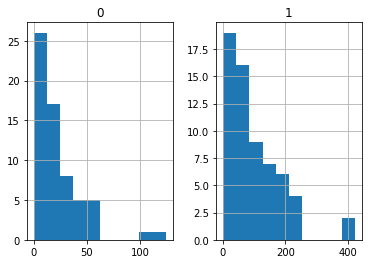

                0           1
count   63.000000   63.000000
mean    22.904762   98.187302
std     23.351946   87.327553
min      0.000000    0.000000
25%      7.500000   38.850000
50%     14.000000   73.400000
75%     29.000000  140.000000
max    124.000000  422.200000


In [4]:
from matplotlib import pyplot
df.hist()
pyplot.show()
print(df.describe())

Epoch 1/1000
3/3 [==============================] - 1s 75ms/step - loss: 25626.2109 - val_loss: 33514.0938
Epoch 2/1000
3/3 [==============================] - 0s 12ms/step - loss: 25261.2207 - val_loss: 33025.0430
Epoch 3/1000
3/3 [==============================] - 0s 13ms/step - loss: 24893.9922 - val_loss: 32563.4082
Epoch 4/1000
3/3 [==============================] - 0s 11ms/step - loss: 24578.6816 - val_loss: 32108.0156
Epoch 5/1000
3/3 [==============================] - 0s 11ms/step - loss: 24243.9297 - val_loss: 31691.5234
Epoch 6/1000
3/3 [==============================] - 0s 11ms/step - loss: 23913.3848 - val_loss: 31304.7266
Epoch 7/1000
3/3 [==============================] - 0s 12ms/step - loss: 23619.1602 - val_loss: 30917.9102
Epoch 8/1000
3/3 [==============================] - 0s 10ms/step - loss: 23350.4824 - val_loss: 30532.8164
Epoch 9/1000
3/3 [==============================] - 0s 12ms/step - loss: 23091.3828 - val_loss: 30162.7500
Epoch 10/1000
3/3 [==================

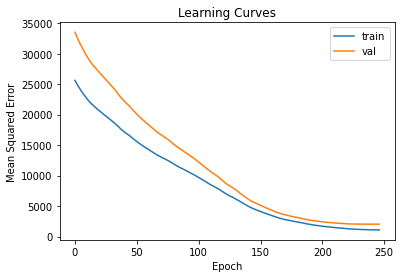

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import math

X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
# model.add(Dense(184, activation = 'relu',kernel_initializer='he_normal'))
#model.add(Dense(32, activation = 'relu',kernel_initializer='he_normal'))

model.add(Dense(8, activation = 'relu',kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# fit the model
#history = model.fit(X_train, y_train, epochs=1000, batch_size=128, verbose=1, validation_data=(X_test,y_test))
with tf.device('/gpu:0'):
  history=model.fit(X_train,y_train,batch_size=20,epochs=1000,validation_data=(X_test,y_test),callbacks=[early_stop])
# predict test set
yhat = model.predict(X_test)
# evaluate predictions
score = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % score)

mse = mean_squared_error(y_test, yhat)
rmse = math. sqrt(mse)
print('rmse=',rmse)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [6]:
# from sklearn.preprocessing import MinMaxScaler
# # ensure target is a 2d array
# y = y.reshape((len(y),1))
# # prepare input data
# pt1 = MinMaxScaler()
# pt1.fit(X)
# X = pt1.transform(X)
# # prepare target
# pt2 = MinMaxScaler()
# pt2.fit(y)
# y = pt2.transform(y)
# # determine the number of input features
# n_features = X.shape[1]
# # define model
# model = Sequential()
# model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
# model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
# model.add(Dense(1))
# # compile the model
# model.compile(optimizer='adam', loss='mse')
# # fit the model
# model.fit(X, y, epochs=200, batch_size=8, verbose=0)
# # define a row of new data
# row = [13]
# # transform the input data
# X_new = pt1.transform([row])
# # make prediction
# yhat = model.predict(X_new)
# # invert transform on prediction
# yhat = pt2.inverse_transform(yhat)
# # report prediction
# print('f(%s) = %.3f' % (row, yhat[0]))
